<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A/B-тест-для-увеличения-выручки" data-toc-modified-id="A/B-тест-для-увеличения-выручки-1">A/B-тест для увеличения выручки</a></span><ul class="toc-item"><li><span><a href="#Общая-информация." data-toc-modified-id="Общая-информация.-1.1">Общая информация.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2">Предобработка данных</a></span></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-1.3">Приоритизация гипотез</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-1.4">Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Анализ-метрик" data-toc-modified-id="Анализ-метрик-1.4.1">Анализ метрик</a></span></li><li><span><a href="#Анализ-выбросов" data-toc-modified-id="Анализ-выбросов-1.4.2">Анализ выбросов</a></span></li><li><span><a href="#Анализ-A/B-теста" data-toc-modified-id="Анализ-A/B-теста-1.4.3">Анализ A/B-теста</a></span><ul class="toc-item"><li><span><a href="#Оценка-статистической-значимости-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным" data-toc-modified-id="Оценка-статистической-значимости-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«сырым»-данным-1.4.3.1">Оценка статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным</a></span></li><li><span><a href="#Оценка-статистической-значимости-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным" data-toc-modified-id="Оценка-статистической-значимости-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-«очищенным»-данным-1.4.3.2">Оценка статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным</a></span></li><li><span><a href="#Оценка-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным" data-toc-modified-id="Оценка-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«сырым»-данным-1.4.3.3">Оценка статистической значимости различий в среднем чеке заказа между группами по «сырым» данным</a></span></li><li><span><a href="#Оценка-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным" data-toc-modified-id="Оценка-статистической-значимости-различий-в-среднем-чеке-заказа-между-группами-по-«очищенным»-данным-1.4.3.4">Оценка статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным</a></span></li></ul></li><li><span><a href="#Анализ-кумулятивной-выручки-без-учета-аномальных-значений" data-toc-modified-id="Анализ-кумулятивной-выручки-без-учета-аномальных-значений-1.4.4">Анализ кумулятивной выручки без учета аномальных значений</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5">Вывод</a></span></li></ul></li></ul></div>

# A/B-тест для увеличения выручки

**Цель исследования** - выбор подходящего способа для увеличения выручки интернет-магазина

**Оцениваемы параметры**:  

* кумулятивная выручка
* средний чек
* среднее количество заказов на посетителя

**План исследования**:  

* выбор гипотезы для тестирования
* проведение A/B-теста
* анализ результатов
  * визуализация кумулятивных метрик
  * анализ выбросов
  * оценка статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным
  * оценка статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным  
  * оценка статистической значимости различий в среднем чеке заказа между группами по «сырым» данным 
  * оценка статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

## Общая информация.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
from scipy import stats as st
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
pd.set_option('max_colwidth', 120)

In [52]:
#загрузим данные
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')    
    

In [53]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [54]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице `hypothesis` пять столбцов.  
Форматы данных корректны

Согласно документации к данным:  

* `Hypothesis` — краткое описание гипотезы
* `Reach` — охват пользователей по 10-балльной шкале
* `Impact` — влияние на пользователей по 10-балльной шкале
* `Confidence` — уверенность в гипотезе по 10-балльной шкале
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение, тем дороже проверка гипотезы


In [55]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [56]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице `orders` пять столбцов.  
Столбец date нужно преобразовать к формату дат. Остальное верно.

Согласно документации к данным:  

* `transactionId` — идентификатор заказа
* `visitorId` — идентификатор пользователя, совершившего заказ
* `date` — дата, когда был совершён заказ
* `revenue` — выручка заказа
* `group` — группа A/B-теста, в которую попал заказ


In [57]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [58]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице `visitors` три столбца  
Столбец date нужно преобразовать к формату дат. Остальное верно.

Согласно документации к данным:  

* `date` — дата
* `group` — группа A/B-теста
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


## Предобработка данных

In [59]:
#приведем к нижнему регистру названия столбцов
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()
orders = orders.rename(columns={'transactionid': 'transaction_id','visitorid':'visitor_id'})

In [60]:
#проверим пропуски
print(hypothesis.isna().sum())
print()
print(orders.isna().sum())
print()
print(visitors.isna().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

date        0
group       0
visitors    0
dtype: int64


пропусков нет

In [61]:
#проверим дубликаты
display(hypothesis[hypothesis.duplicated(subset=['hypothesis'])])
display(orders[orders.duplicated(subset=['transaction_id'])])
display(visitors[visitors.duplicated(subset=['date','group'])])

,hypothesis,reach,impact,confidence,efforts


,transaction_id,visitor_id,date,revenue,group


,date,group,visitors


дубликатов нет

In [62]:
#преобразуем столбцы с датами в нужный формат
orders['date'] = pd.to_datetime(orders['date']).dt.normalize()
visitors['date'] = pd.to_datetime(visitors['date']).dt.normalize()


In [63]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


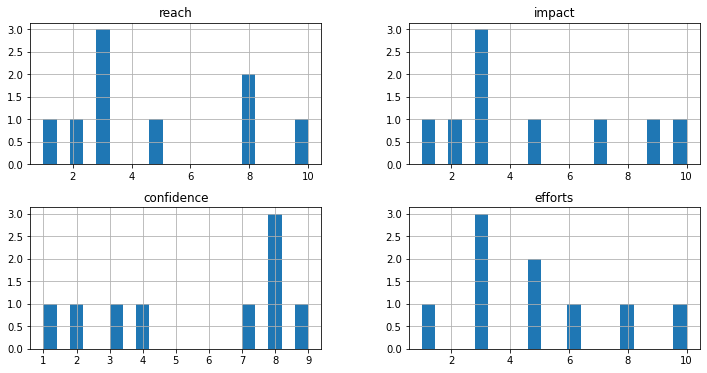

In [64]:
#проверим корректость данных таблицы hypothesis
hypothesis.hist(figsize=(12, 6), bins = 20);

Оценки распределены от 1 до 10, некорректных значений нет  
По всем параметрам кроме `confidence` большинство оценкок распределениы возде низких значений (топ оценка 3)  
В параметре `confidence` наоборот, топ оценка 8

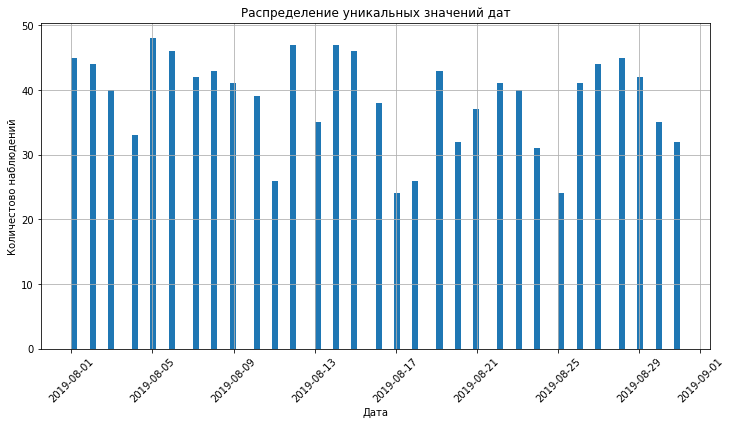

In [65]:
# проверим корректость данных таблицы orders

# проверим даты
orders['date'].sort_values().hist(figsize=(12, 6),bins = 100)
plt.xlabel('Дата')
plt.ylabel('Количестово наблюдений')
plt.title('Распределение уникальных значений дат')
plt.xticks(rotation=45);

Даты не выбиваются, количестов заказов в день примерно одинаковое, с цикличными провалами в пятницу-субботу  
Период 2019/08/01-2019/08-31

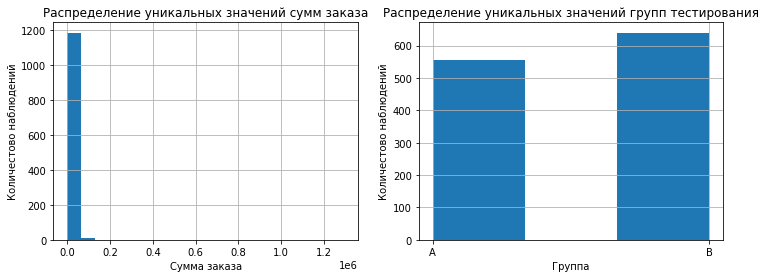

In [66]:
plt.figure(figsize=(12, 4))

# проверим распределения сумм заказов
ax1 = plt.subplot(1, 2, 1)
orders['revenue'].sort_values().hist(bins=20,ax=ax1)
plt.xlabel('Сумма заказа')
plt.ylabel('Количестово наблюдений')
plt.title('Распределение уникальных значений сумм заказа')
# проверим распределения групп
ax2 = plt.subplot(1, 2, 2)
orders['group'].sort_values().hist(bins=3,ax=ax2);
plt.xlabel('Группа')
plt.ylabel('Количестово наблюдений')
plt.title('Распределение уникальных значений групп тестирования');


Большинство заказов менее 100 тыс, есть аномально высокие значения  
Заказов группы В больше группы А на ~ 100 

Проверим пересечение пользователей между группами

In [67]:
#посчитаем пользователей, которые оказались в обеих группах
check = orders.groupby('visitor_id', as_index=False).agg({'group' : 'nunique'})
print('Количество пересекающихся пользователей в обеих группах:',
            len(check[check['group']>1]), 'из', orders['visitor_id'].nunique ())
print('Доля пересекающихся пользователей в обеих группах: {:.2f}%'.format(
            len(check[check['group']>1])*100/orders['visitor_id'].nunique ()))

Количество пересекающихся пользователей в обеих группах: 58 из 1031
Доля пересекающихся пользователей в обеих группах: 5.63%


Удалить нельзя оставить

Количество пользователей небольшое, но считаю,что лучше их удалить, тк это могло повлиять на результаты исследования


In [68]:
cross_visitors = check[check['group']>1]['visitor_id']
orders = orders [np.logical_not(orders['visitor_id'].isin(cross_visitors))]

In [69]:
check = orders.groupby('visitor_id', as_index=False).agg({'group' : 'nunique'})
print('Количество пересекающихся пользователей в обеих группах:',
            len(check[check['group']>1]), 'из', orders['visitor_id'].nunique ())
print('Доля пересекающихся пользователей в обеих группах: {:.2f}%'.format(
            len(check[check['group']>1])*100/orders['visitor_id'].nunique ()))

Количество пересекающихся пользователей в обеих группах: 0 из 973
Доля пересекающихся пользователей в обеих группах: 0.00%


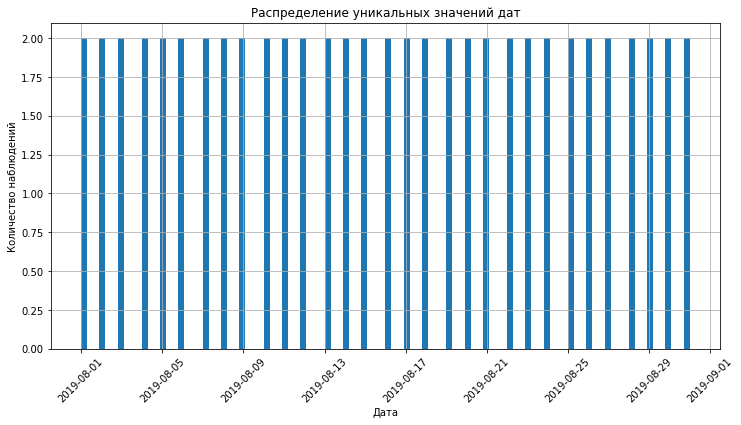

In [70]:
# проверим корректость данных таблицы visitors

# проверим даты
visitors['date'].sort_values().hist(figsize=(12, 6),bins = 100)
plt.xlabel('Дата')
plt.ylabel('Количество наблюдений')
plt.title('Распределение уникальных значений дат')
plt.xticks(rotation=45);

Некорректных дат нет. Каждый день по две группы.  
Период 2019/08/01-2019/08-31

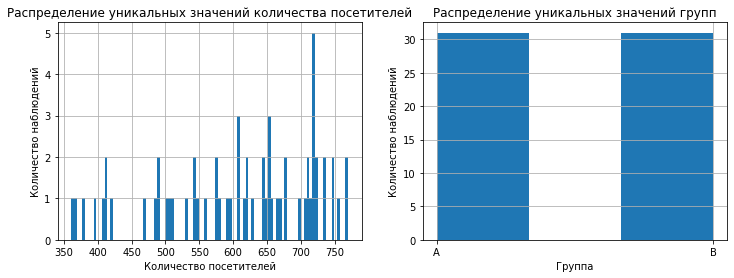

In [71]:
plt.figure(figsize=(12, 4))

# проверим распределения количества посетителей
ax1 = plt.subplot(1, 2, 1)
visitors['visitors'].sort_values().hist(bins=100,ax=ax1)
plt.xlabel('Количество посетителей')
plt.ylabel('Количество наблюдений')
plt.title('Распределение уникальных значений количества посетителей')
ax2 = plt.subplot(1, 2, 2)
visitors['group'].sort_values().hist(bins=3,ax=ax2)
plt.xlabel('Группа')
plt.ylabel('Количество наблюдений')
plt.title('Распределение уникальных значений групп');

По количеству пользователей в день выраженных аномалий нет.  
Каждый день по одной записи на группу

**Некорректных значений в данных не обнаружено  
Пропусков и дубликатов не было  
Есть пересечения пользователей по группам, 58 пользователей присутсвуют в обеих группах**

## Приоритизация гипотез

**Приоритизация методом ICE**

In [72]:
hypothesis['ICE'] = (hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']
display(hypothesis.sort_values(by='ICE', ascending=False))


,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


По методу **ICE** перспективные гипотезы: 
 * Запустить акцию, дающую скидку на товар в день рождения	
 * Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
 * Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

**Приоритизация методом RICE**

In [73]:
hypothesis['RICE'] = (hypothesis['impact']*hypothesis['confidence']*hypothesis['reach'])/hypothesis['efforts']
display(hypothesis.sort_values(by='RICE', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


По методу **RICE** перспективные гипотезы:
  
 * Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
 * Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
 * Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
 * Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	

При использовании данного метода на первое место вышла гипотеза для сбора данных, тк она влияет на максимальное число пользователей, параметр reach =10

Гипотеза со скидками в день рождения сместилась на 5 место, те количество пользователей, которое она затронет минимально.

Для запуска нам нужна гипотеза, которая повлияет на имеющиеся показатели выручки и охватит максимальное количество пользователей  

Поэтому тестируем гипотезу  
**Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа  
или  
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию**

## Анализ A/B-теста

### Анализ метрик

In [74]:
# подготовим общую таблицу с кумулятивными данными по всем параметрам
# определим пары дата - группа
datesgroups = orders[['date', 'group']].drop_duplicates()

# получим агрегированные кумулятивные данные о заказах по дням
revenue_cum = datesgroups.apply(
        lambda x: orders [np.logical_and(
            orders['date']<=x['date'],orders['group']==x['group'])].agg({'date': 'max',
                                                                        'group': 'max',
                                                                        'transaction_id': 'nunique',
                                                                        'visitor_id': 'nunique',
                                                                        'revenue': 'sum'}),axis=1).sort_values(by=['date','group'])


# получим агрегированные кумулятивные данные о посетителях по дням
visitors_cum = datesgroups.apply(
        lambda x: visitors [np.logical_and(
            visitors['date']<=x['date'],visitors['group']==x['group'])].agg({'date': 'max',
                                                                        'group': 'max',
                                                                        'visitors': 'sum'}),axis=1).sort_values(by=['date','group'])

# объединим кумулятивные данные в одной таблице и присваивоим ее столбцам понятные названия
data_cum = revenue_cum.merge(visitors_cum, left_on = ['date','group'], right_on = ['date','group'])
data_cum.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


**Построим графики кумулятивной выручки по дням и группам A/B-тестирования:**

In [75]:
#отберем данные по группам:
data_cum_A = data_cum[data_cum['group']=='A']
data_cum_B = data_cum[data_cum['group']=='B']

In [76]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

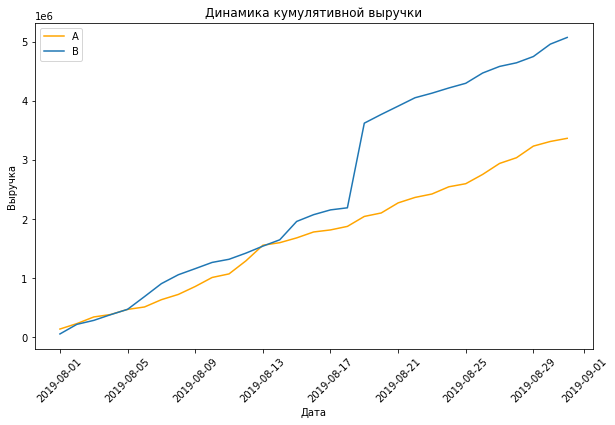

In [77]:
#строим графики
plt.figure(figsize=(10, 6))
plt.plot(data_cum_A['date'], data_cum_A['revenue'], color='orange', label='A')
plt.plot(data_cum_B['date'], data_cum_B['revenue'], label='B')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Динамика кумулятивной выручки')
plt.legend()
plt.show();

Выручки обеих групп растут на протяжении всего периода  
В течении первых 15 дней выручка группы B немного превышала выручку группы A  
В середине анализиремого периода наблюдается резкий скачок выручки группы B  
Это может быть связано либо с увеличением количества заказов либо с увеличением среднего чека в группе B

**Построим график динамики среднего чека по дням и группам A/B-тестирования:**

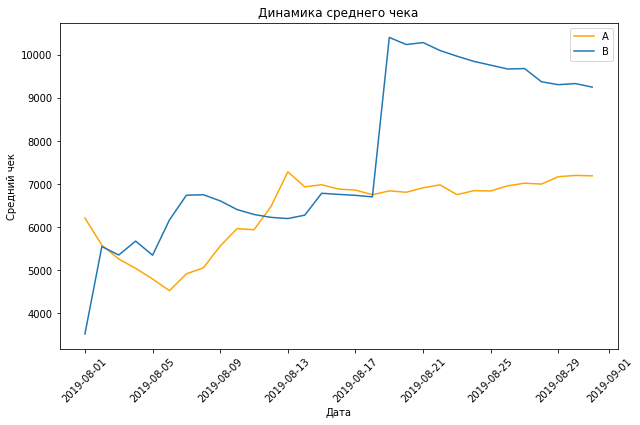

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(data_cum_A['date'], data_cum_A['revenue']/data_cum_A['orders'], color='orange', label='A')
plt.plot(data_cum_B['date'], data_cum_B['revenue']/data_cum_B['orders'], label='B')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Динамика среднего чека')
plt.legend()
plt.show();

Нестабильные метрики, средний чек группы А зафиксировался во второй половине месяца после роста
Средний чек группы B по большей части выше группы А , но в первой половине месяца есть где значения выше группа А
Далее, после 17 числа мы видим резкий рост чека группы B, то есть в выборку попал крупный(ые) заказ(ы)

**Построим график относительного различия для среднего чека**

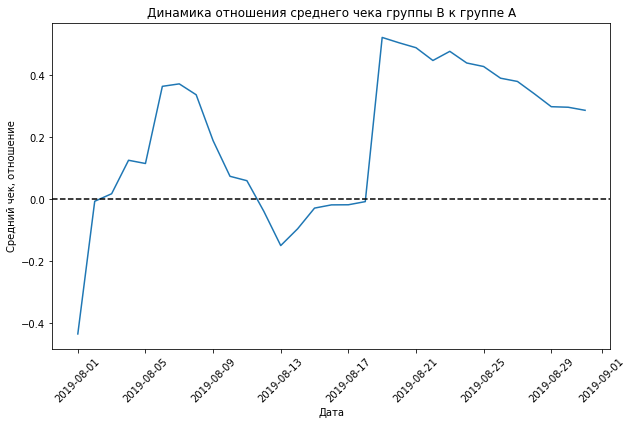

In [79]:
data_cum_merged = data_cum_A.merge(data_cum_B, left_on='date', right_on='date', suffixes=['A', 'B'])


plt.figure(figsize=(10, 6))
plt.plot(data_cum_merged['date'], (data_cum_merged['revenueB']/data_cum_merged['ordersB'])/(data_cum_merged['revenueA']/data_cum_merged['ordersA'])-1)
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Средний чек, отношение')
plt.title('Динамика отношения среднего чека группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show();

Средний чек группы B выше, также явно видны два пика с крупными заказами - около 8 и 19 числа  
Но также есть провалы в начале периода и середине месяца где значения среднего чека группы А выше равны

**Построим график кумулятивного среднего количества заказов на посетителя**

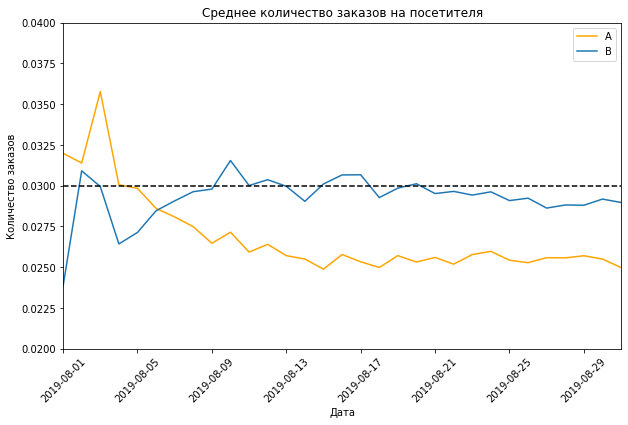

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(data_cum_merged['date'],(data_cum_merged['ordersA']/data_cum_merged['visitorsA']), color='orange', label='A')
plt.plot(data_cum_merged['date'],(data_cum_merged['ordersB']/data_cum_merged['visitorsB']), label='B')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.title('Среднее количество заказов на посетителя')
plt.legend()
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.04])
plt.axhline(y=0.03, color='black', linestyle='--') 
plt.show();


В начале периода значения среднего количества заказов в обеих группах были близки, но в дальнейшем зафиксировались: доля заказов в группе B ~ 3%  и стабильно выше группы A  
Среднее количество заказов группы A было в начале периода выше группы B, но затем начало резко снижаться, зафиксировавшись в конце месяца

**Построим график относительного изменения кумулятивного среднего количества заказов**

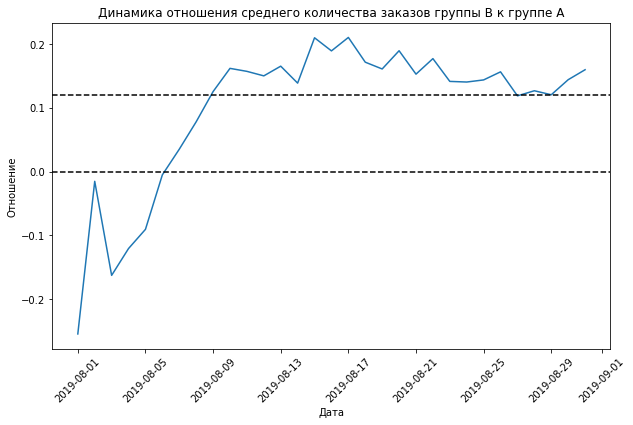

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(data_cum_merged['date'],(data_cum_merged['ordersB']/data_cum_merged['visitorsB'])/(data_cum_merged['ordersA']/data_cum_merged['visitorsA'])-1)
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Отношение')
plt.title('Динамика отношения среднего количества заказов группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.12, color='black', linestyle='--') 
plt.show();

Также видим, что на протяжении почти всего теста количество заказов группы B выше группы A на 12%

По предварительной оценке метрик кажется, что показатели группы B (выручка, средний чек, среднее количество заказов) лучше группы A  
Проверим аномальные значения, тк они могли повлиять на показатели

### Анализ выбросов

In [82]:
# посчитаем количестово заказов на одного покупателя
orders_per_user = orders.groupby('visitor_id', as_index=False)['transaction_id'].nunique()
orders_per_user.columns = ['visitor_id', 'orders']
display(orders_per_user.sort_values(by = 'orders',ascending=False))

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


Посмотрим на распределение на графике

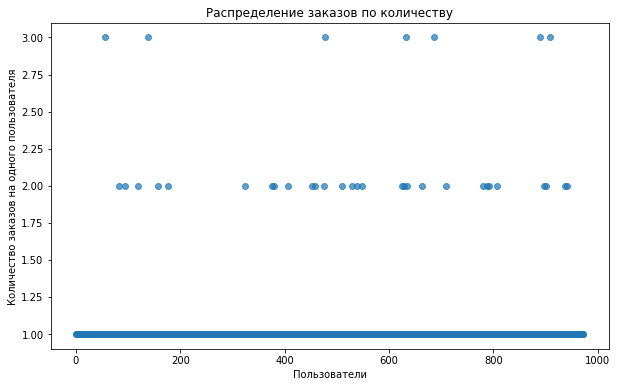

In [83]:
x_values = pd.Series(range(0,len(orders_per_user)))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, orders_per_user['orders'], alpha=0.7)
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов на одного пользователя')
plt.title('Распределение заказов по количеству');

Большинство покупателей заказывали только один раз  
Два - три заказа реже  

Посчитаем персентили количества заказов на одного пользователя:

In [84]:
print('95 персентиль', np.percentile(orders_per_user['orders'], 95))
print('99 персентиль', np.percentile(orders_per_user['orders'], 99)) 

95 персентиль 1.0
99 персентиль 2.0


95% пользователей оформили 1 заказа и менее.  
99% пользователей оформили 2 заказа и менее.  

Уберем для анализа пользователей с количеством заказов более 2

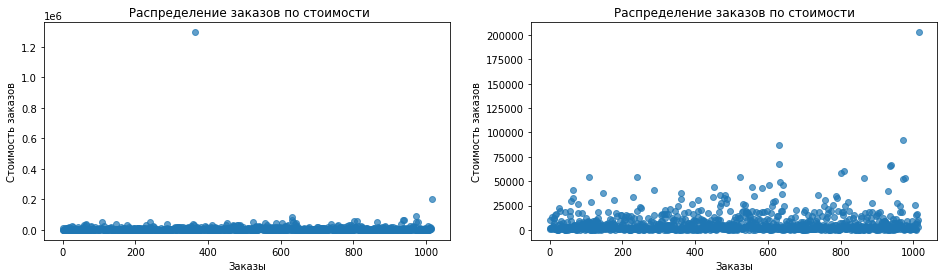

In [85]:
# построим точеченую диаграмму распределения стоимости заказов


plt.figure(figsize=(16, 4))

ax1 = plt.subplot(1, 2, 1)
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue'], alpha=0.7)
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.title(' Распределение заказов по стоимости')

# отфильтруем один заказ стоимостью 1 200 000;
ax2 = plt.subplot(1, 2, 2)
orders_filt = orders[orders['revenue']<1200000]
x_values = pd.Series(range(0,len(orders_filt)))
plt.scatter(x_values, orders_filt['revenue'], alpha=0.7)
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказов')
plt.title('Распределение заказов по стоимости');



Большинство заказов стоимостью менее ~ 50 тысяч  
Есть несколько аномально высоких значений ~ 200 тысяч и ~ 1.3 млн  

Для более точной оценки посчитаем персентили:

In [86]:
print('95 персентиль', np.percentile(orders['revenue'], 95))
print('99 персентиль', np.percentile(orders['revenue'], 99)) 

95 персентиль 26785.0
99 персентиль 53904.0


95% заказов на сумму 27 000 и менее.  
99% заказов на сумму 54 000 и менее.  

Уберем для анализа пользователей с суммой заказов более 54000

### Анализ A/B-теста

Подготовим общую таблицу с данными

In [87]:
# отбор посетителей по группам по дням
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#### Оценка статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным


  

Сформулируем гипотезы.  
H0 - различий в среднем количестве заказов между группами нет.  
H1 - различия в среднем количестве заказов между группами есть.  
alpha = 0.05

In [88]:
# посчитаем количестово заказов на пользователя по каждому ID

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

Для оценки статистической значимости будем использовать критерий Манна-Уитни, тк распределение заказов не является нормальным

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.  
Тем, кто ничего не заказал, будут соответствовать нули.  

In [89]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [90]:
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Отношение среднего числа заказов на пользователя группы B к группе A: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-value: 0.011
Отношение среднего числа заказов на пользователя группы B к группе A: 0.160


**Отвергаем нулевую гипотезу  
Статистически значимые различия в среднем числе заказа на одного пользователя есть  
Cреднее число заказов в группе B больше, чем в группе A на 16%**



#### Оценка статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным



Сформулируем гипотезы.  
H0 - различий в среднем чеке между группами нет.  
H1 - различия в среднем чеке между группами есть.  
alpha = 0.05

In [91]:
print('p-value: {0:.3f}'.format(
                stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Отношение среднего чека группы B к группе A: {0:.3f}'.format(
                orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
Отношение среднего чека группы B к группе A: 0.287


**Нет оснований отвергнуть нулевую гипотезу  
Статистически значимых различий в среднем чеке нет  
Можем предположить, что на разницу в среднем чеке могли повлиять аномальные значения**


**Проведем тесты по очищенным данным**

Посчитаем аномальных пользователей
 * заказов более 2
 * сумма заказа более 54000

In [92]:
usersWithManyOrders = orders_per_user[orders_per_user['orders'] > np.percentile(orders_per_user['orders'], 99)]['visitor_id']

usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0])

1099    148427295
55      249864742
138     611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64

16

In [93]:
print('Количество аномальных пользователей в обеих группах:',
                                                                abnormalUsers.shape[0], 'из', orders['visitor_id'].nunique ())
print('Доля аномальных пользователей в обеих группах: {:.2f}%'.format(
                                                                abnormalUsers.shape[0]*100/orders['visitor_id'].nunique ()))

Количество аномальных пользователей в обеих группах: 16 из 973
Доля аномальных пользователей в обеих группах: 1.64%


In [94]:
# отфильтруем выборки
sampleAFiltered = pd.concat(
[
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#### Оценка статистической значимости различий в среднем чеке заказа между группами по «сырым» данным


Сформулируем гипотезы.  
H0 - различий в среднем количестве заказов между группами нет.  
H1 - различия в среднем количестве заказов между группами есть.  
alpha = 0.05

In [95]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отношение среднего числа заказов на пользователя группы B к группе A: {0:.3f}'.format(
                                                                    sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.007
Отношение среднего числа заказов на пользователя группы B к группе A: 0.189


**Отвергаем нулевую гипотезу  
Статистические различия в среднем числе заказа на одного пользователя есть  
Cреднее число заказов в группе B больше, чем в группе A на 18.9%**

**Общий вывод не изменился:**  
 * **p-value не превышает уровень значимости в 5%**  
 * **cтатистические различия в среднем числе заказов есть** 
 
**Относительная разница в среднем числе заказов увеличилась с 16% до 18.9%**

#### Оценка статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным


Сформулируем гипотезы.  
H0 - различий в среднем чеке между группами нет.  
H1 - различия в среднем чеке между группами есть.  
alpha = 0.05

In [96]:
print('p-value: {0:.3f}'.format(
        stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
            np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'],orders[
            np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'],)[1]))

print("Отношение среднего чека группы B к группе A: {0:.3f}".format(
        orders[np.logical_and(orders['group'] == 'B',
             np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'].mean()/ orders[
             np.logical_and(orders['group'] == 'A',
             np.logical_not(orders['visitor_id'].isin(abnormalUsers)),)]['revenue'].mean()- 1))

p-value: 0.788
Отношение среднего чека группы B к группе A: -0.032


**Нет оснований отвергнуть нулевую гипотезу  
Статистических различий в среднем чеке нет** 

**p-value увеличился после исключения данных с 70 до 82% и выше  уровня значимости в 5%  
Превосходство группы B исчезло (было +28.7%, стало -3.2%)**  

**Значит на исходные данные сильное влияние оказали аномалии и в реальности деле средний чек группы B сопоставим с группой A**

### Анализ кумулятивной выручки без учета аномальных значений

 Визуализируем динамику кумулятивной выручки без учета аномальных значений и посчитаем прирост на конец периода

In [97]:
# отфильтруем данные
orders_filtered = orders [np.logical_not(orders['visitor_id'].isin(abnormalUsers))]

# получим агрегированные кумулятивные данные о заказах по дням
revenue_cum2 = datesgroups.apply(
    lambda x: orders_filtered [np.logical_and(
        orders_filtered['date']<=x['date'],orders_filtered['group']==x['group'])].agg({'date': 'max',
                                                                    'group': 'max',
                                                                    'transaction_id': 'nunique',
                                                                    'visitor_id': 'nunique',
                                                                    'revenue': 'sum'}),axis=1).sort_values(by=['date','group'])


# получим агрегированные кумулятивные данные о посетителях по дням
visitors_cum2 = datesgroups.apply(
    lambda x: visitors [np.logical_and(
        visitors['date']<=x['date'],visitors['group']==x['group'])].agg({'date': 'max',
                                                                    'group': 'max',
                                                                    'visitors': 'sum'}),axis=1).sort_values(by=['date','group'])

# объединим кумулятивные данные в одной таблице и присваивоим ее столбцам понятные названия
data_cum2 = revenue_cum2.merge(visitors_cum2, left_on = ['date','group'], right_on = ['date','group'])
data_cum2.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

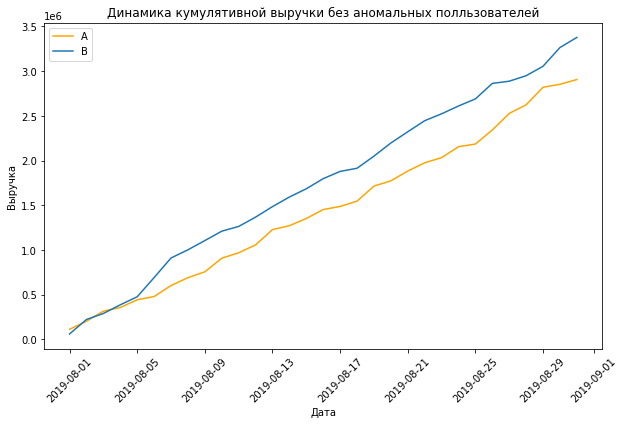

In [98]:
#отберем данные по группам:
data_cum_A2 = data_cum2[data_cum2['group']=='A']
data_cum_B2 = data_cum2[data_cum2['group']=='B']
#строим графики
plt.figure(figsize=(10, 6))
plt.plot(data_cum_A2['date'], data_cum_A2['revenue'], color='orange', label='A')
plt.plot(data_cum_B2['date'], data_cum_B2['revenue'], label='B')
plt.xticks(rotation=45)
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Динамика кумулятивной выручки без аномальных полльзователей')
plt.legend()
plt.show();

In [99]:
print("Прирост выручки на конец периода группы B к группе A: {0:.1f}%".format(
                                        (data_cum_B2['revenue'].max()*100/data_cum_A2['revenue'].max())-100))

Прирост выручки на конец периода группы B к группе A: 16.2%


Проверим, насколько группы отличаются по количеству пользователей (после удаления аномальных значений)

In [100]:
print("Численность группы B больше группы A: {0:.1f}%".format(
            (visitors[visitors['group']=='B']['visitors'].sum()*100/visitors[visitors['group']=='A']['visitors'].sum())-100))

Численность группы B больше группы A: 1.0%


Группа B больше группы A на 1%, поэтому можем оценить общий прирост выручки  
Без учета аномальных пользователей выручка группы B была стабильно больше группы A  
На конец периода прирост составил +16%

## Вывод

В ходе исследования был подготовлен и приоритезирован список гипотез для увеличения выручки  
В результате был запущен A/B-тест для увеличения среднего количества заказов на посетителя и увеличения среднего чека  

**Выводы**


* Есть статистически значимое различие в среднем количестве заказов на посетителя между тестовой и контрольной группами как по сырым данным, так и после фильтрации аномалий  
 Среднее количество заказов группы B выше группы A на 13.8% по сырым данным и на 17.6% по очищенным
 
 * Нет статистически значимого различия по среднему чеку между тестовой и контрольной группами как по сырым данным, так и после фильтрации аномалий
 * Выручка группы B за период без учета аномальных пользователей выше группы A на 16%  
 
Метрика среднего количества заказов зафиксировалась, поэтому тест можно остановить  
 
Проведенное тестирование оказалось успешным и позволило увеличить выручку за счет увеличения числа заказов, но не повлиляло на средний чек  
 
Необходимо отметить, что из исходной выборки мы удалили около 5% пользователей, тк они находились в обеих группах. Уменьшение выборки могло повлиять на результаты  
 
Останавливаем тестирование и переходим к проверке следующей гипотезы для увеличения среднего чека
 
 
 
 
 
 